# IMACU figure making
## behavioural figure
### import

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

### load data
first: MASSes

In [2]:
# MASS
# "D:\IMACU\behav\IMACU_behav_final.xlsx"
FORMAT = ['soreness', 'aching', 'deep_pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp_pain', 'dull_pain', 'warmness', 'cold', 'throbbing']

df_raw_StimAcu = pd.read_csv('.../IMACU/MASS/Stimulation_session1_Acu.csv')#get the values for a given file
df_raw_StimC1 = pd.read_csv('.../IMACU/MASS/Stimulation_session1_C1.csv')#get the values for a given file
df_raw_StimC2 = pd.read_csv('.../IMACU/MASS/Stimulation_session1_C2.csv')#get the values for a given file
df_raw_ImagAcu = pd.read_csv('.../IMACU/MASS/Imagery_session1_Acu.csv')#get the values for a given file
df_raw_ImagC1 = pd.read_csv('.../IMACU/MASS/Imagery_session1_C1.csv')#get the values for a given file
df_raw_ImagC2 = pd.read_csv('.../IMACU/MASS/Imagery_session1_C2.csv')#get the values for a given file
df_raw_Imag2Acu = pd.read_csv('.../IMACU/MASS/Imagery_session2_Acu.csv')#get the values for a given file
df_raw_Imag2C1 = pd.read_csv('.../IMACU/MASS/Imagery_session2_C1.csv')#get the values for a given file
df_raw_Imag2C2 = pd.read_csv('.../IMACU/MASS/Imagery_session2_C2.csv')#get the values for a given file

# get the stims
df_StimAcu = df_raw_StimAcu[FORMAT]
df_StimC1 = df_raw_StimC1[FORMAT]
df_StimC2 = df_raw_StimC2[FORMAT]

df_StimAcu_clean = np.delete(df_StimAcu.values, [10], 0)
df_StimC1_clean = np.delete(df_StimC1.values, [10], 0)
df_StimC2_clean = np.delete(df_StimC2.values, [10], 0)

stim_acu = np.nan_to_num(df_StimAcu_clean) # sj 6 has some NaNs
stim_C1 = np.nan_to_num(df_StimC1_clean) 
stim_C2 = np.nan_to_num(df_StimC2_clean) 

df_ImagAcu = df_raw_ImagAcu[FORMAT]
df_ImagC1 = df_raw_ImagC1[FORMAT]
df_ImagC2 = df_raw_ImagC2[FORMAT]

df_ImagAcu_clean = np.delete(df_ImagAcu.values, [10], 0)
df_ImagC1_clean = np.delete(df_ImagC1.values, [10], 0)
df_ImagC2_clean = np.delete(df_ImagC2.values, [10], 0)

imag_acu = np.nan_to_num(df_ImagAcu_clean) # sj 6 has some NaNs
imag_C1 = np.nan_to_num(df_ImagC1_clean) 
imag_C2 = np.nan_to_num(df_ImagC2_clean) 

df_Imag2Acu = df_raw_Imag2Acu[FORMAT]
df_Imag2C1 = df_raw_Imag2C1[FORMAT]
df_Imag2C2 = df_raw_Imag2C2[FORMAT]

df_Imag2Acu_clean = np.delete(df_Imag2Acu.values, [10], 0)
df_Imag2C1_clean = np.delete(df_Imag2C1.values, [10], 0)
df_Imag2C2_clean = np.delete(df_Imag2C2.values, [10], 0)

imag2_acu = np.nan_to_num(df_Imag2Acu_clean) # sj 6 has some NaNs
imag2_C1 = np.nan_to_num(df_Imag2C1_clean) 
imag2_C2 = np.nan_to_num(df_Imag2C2_clean) 

next: button-presses

In [9]:
# button-presses
answers = np.zeros([24,7,9,5])
path = '.../IMACU/Logs/logs_sorted/'

counter = 0
for s in np.arange(26):

    if s == 4 or s == 10:
        continue
    else:
        for r in np.arange(7):

            files = []
            for i in os.listdir(path):
                if os.path.isfile(os.path.join(path,i)) and 'newLogFile_subject_' + str(s+1) + '_sess_1_run_' + str(r+1) in i:
                    files.append(i)        

            log_file = pd.read_csv('.../IMACU/Logs/logs_sorted/' + files[0], sep = '\t')

            answers[counter,r,0,:] = log_file[log_file['TrialNr'].values == 1]['Response'].values
            answers[counter,r,1,:] = log_file[log_file['TrialNr'].values == 2]['Response'].values
            answers[counter,r,2,:] = log_file[log_file['TrialNr'].values == 3]['Response'].values
            answers[counter,r,3,:] = log_file[log_file['TrialNr'].values == 4]['Response'].values
            answers[counter,r,4,:] = log_file[log_file['TrialNr'].values == 5]['Response'].values
            answers[counter,r,5,:] = log_file[log_file['TrialNr'].values == 6]['Response'].values

            files = []
            for i in os.listdir(path):
                if os.path.isfile(os.path.join(path,i)) and 'newLogFile_subject_' + str(s+1) + '_sess_2_run_' + str(r+1) in i:
                    files.append(i)        

            log_file = pd.read_csv('.../IMACU/Logs/logs_sorted/' + files[0], sep = '\t')

            answers[counter,r,6,:] = log_file[log_file['TrialNr'].values == 4]['Response'].values
            answers[counter,r,7,:] = log_file[log_file['TrialNr'].values == 5]['Response'].values
            answers[counter,r,8,:] = log_file[log_file['TrialNr'].values == 6]['Response'].values
            
        counter += 1


sj_counts = np.zeros([24,9,5])
for j in np.arange(24):
    for c in np.arange(9):
        unique, counts = np.unique(answers[j,:,c,:], return_counts=True)
        sj_counts[j,c,unique.astype(np.int64)] = counts
        

### plot

combine button presses and MASS data

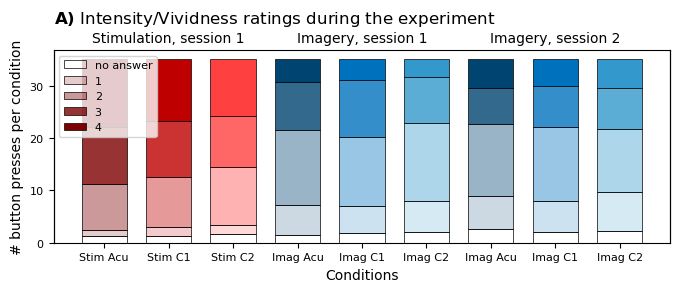

In [10]:
np.mean(sj_counts[:,:,0],axis=0)

ans_opt = np.arange(9)
weight_counts = {
        "no answer": np.mean(sj_counts[:,:,0],axis=0),
        "1": np.mean(sj_counts[:,:,1],axis=0),
        "2": np.mean(sj_counts[:,:,2],axis=0),
        "3": np.mean(sj_counts[:,:,3],axis=0),
        "4": np.mean(sj_counts[:,:,4],axis=0),
}
    
width = 0.7

grayscale = plt.get_cmap('gray')
colors = [grayscale(i / (len(weight_counts)-1)) for i in [4, 3, 2, 1, 0]]

# Plot with grayscale colors
fig, ax = plt.subplots(figsize=(15.919/2, 2.5))
bottom = np.zeros(9)

# Define base colors (one color per bar)
base_colors = np.array([[0.498039215, 0, 0, 1 ],
                         [0.75,         0, 0, 1 ],
                         [1, 0.25, 0.25, 1        ],
                         [0,          0.26666667, 0.44313725, 1        ],
                         [0,          0.44705882, 0.74117647, 1        ],
                         [0.2,        0.6, 0.8, 1        ],
                         [0,          0.26666667, 0.44313725, 1        ],
                         [0,          0.44705882, 0.74117647, 1        ],
                         [0.2,        0.6, 0.8, 1        ]])

# Define opacity levels for stacks (from most opaque for bottom to least for top)
alphas = [0, 0.2, 0.4, 0.8, 1]  # 5 stack layers fading

# Plot stacks
for c1, (boolean, ans_count) in enumerate(weight_counts.items()):  # stack index
    colors_with_alpha = [(r, g, b, alphas[c1]) for r, g, b, _ in base_colors]
    p = ax.bar(ans_opt, ans_count, width, bottom=bottom, color=colors_with_alpha, edgecolor='black', linewidth=0.5, label=boolean)
    bottom += ans_count

ax.set_title("$\\mathbf{A)}$ Intensity/Vividness ratings during the experiment", loc='left', fontsize=12)
ax.legend(loc="best", fontsize=8)
plt.xlabel('Conditions', fontsize=10)
plt.xticks(np.arange(9))
ax.set_xticklabels(['Stim Acu', 'Stim C1', 'Stim C2','Imag Acu', 'Imag C1', 'Imag C2','Imag Acu', 'Imag C1', 'Imag C2'], fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('# button presses per condition', fontsize=10)

# Add group labels centered under each group of 3 bars
group_names = ['Stimulation, session 1', 'Imagery, session 1', 'Imagery, session 2']
group_positions = [1, 4, 7]  # centers of the groups (averages of indices)

# Create a second x-axis for group labels at the bottom
ax2 = ax.twiny()

# Make the secondary axis limits match primary x axis
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(group_positions)
ax2.set_xticklabels(group_names, fontsize=10, fontweight='bold')
ax2.tick_params(axis='x', length=0)  # hide tick lines on secondary axis

# Move the group labels lower below the original labels
ax2.spines['bottom'].set_position(('outward', 40))
ax2.spines['top'].set_visible(False)


plt.show()


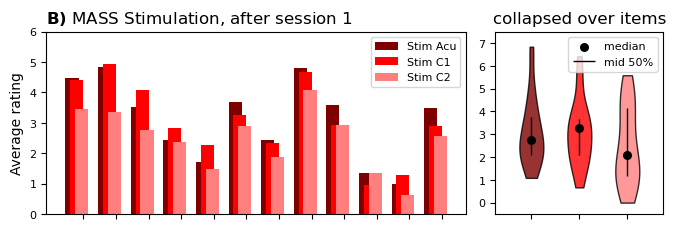

In [11]:

bar_width = 0.7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15.919/2, 2.5), gridspec_kw={'width_ratios': [5,2]}, sharex=False)

# Plot 1: Grouped bar plot
x = np.arange(12)*2
ax1.bar(x, np.mean(stim_acu,0), label = 'Stim Acu', color = '#7f0000')
ax1.bar(x+0.3, np.mean(stim_C1,0), label = 'Stim C1', color = '#ff0000')
ax1.bar(x+0.6, np.mean(stim_C2,0), label = 'Stim C2', color = '#ff7f7f')
ax1.legend(loc='best', fontsize=8)
ax1.set_ylim(0, 6)
ax1.set_xticks(x + bar_width)  # position ticks centered between group bars
ax1.set_xticklabels([str(i) for i in range(12)], fontsize=8)  # or custom labels as needed
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylabel('Average rating', fontsize=10)
#ax1.set_xlabel('MASS items', fontsize=10)
ax1.set_xticklabels(['', '', '', '', '', '', '', '', '', '', '', ''], rotation=30, ha='right')
ax1.set_title('$\\mathbf{B)}$ MASS Stimulation, after session 1', loc='left', fontsize=12)

# Plot 2: Violin plot

def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels, fontsize=8)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.tick_params(axis='y', labelsize=8)

data = (np.mean(stim_acu,1), np.mean(stim_C1,1), np.mean(stim_C2,1))
parts = ax2.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

colours = ['#7f0000', '#ff0000', '#ff7f7f']

for c, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colours[c])
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)

# Calculate quartiles and medians across participants (axis=1)
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='black', s=30, zorder=3, label='median')
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1, label='mid 50%')

labels = ['', '', '']
set_axis_style(ax2, labels)

ax2.set_ylim(-0.5, 7.5)
ax2.set_title("collapsed over items", fontsize=12)
ax2.legend(loc='best', fontsize=8)

plt.subplots_adjust(bottom=0.15, wspace=0.1)

plt.show()


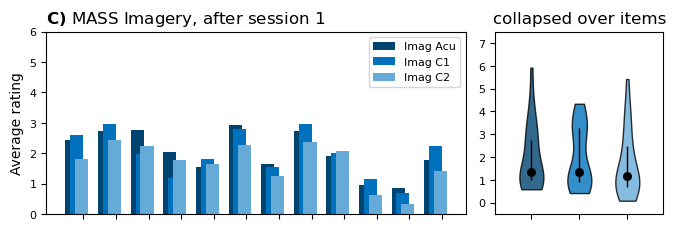

In [14]:

bar_width = 0.7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15.919/2, 2.5), gridspec_kw={'width_ratios': [5,2]}, sharex=False)

# Plot 1: Grouped bar plot
x = np.arange(12)*2
ax1.bar(x, np.mean(imag_acu,0), label = 'Imag Acu', color = '#004471')
ax1.bar(x+0.3, np.mean(imag_C1,0), label = 'Imag C1', color = '#0072bd')
ax1.bar(x+0.6, np.mean(imag_C2,0), label = 'Imag C2', color = '#66aad7')
ax1.legend(loc='best', fontsize=8)
ax1.set_ylim(0, 6)
ax1.set_xticks(x + bar_width)  # position ticks centered between group bars
ax1.set_xticklabels([str(i) for i in range(12)], fontsize=8)  # or custom labels as needed
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylabel('Average rating', fontsize=10)
#ax1.set_xlabel('MASS items', fontsize=10)
ax1.set_xticklabels(['', '', '', '', '', '', '', '', '', '', '', ''], rotation=30, ha='right')
ax1.set_title('$\\mathbf{C)}$ MASS Imagery, after session 1', loc='left', fontsize=12)

# Plot 2: Violin plot
data = (np.mean(imag_acu,1), np.mean(imag_C1,1), np.mean(imag_C2,1))
parts = ax2.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

colours = ['#004471', '#0072bd', '#66aad7']

for c, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colours[c])
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)

# Calculate quartiles and medians across participants (axis=1)
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='black', s=30, zorder=3, label='median')
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1, label='mid 50%')

labels = ['', '', '']
set_axis_style(ax2, labels)

ax2.set_ylim(-0.5, 7.5)
ax2.set_title("collapsed over items", fontsize=12)

plt.subplots_adjust(bottom=0.15, wspace=0.1)

plt.show()


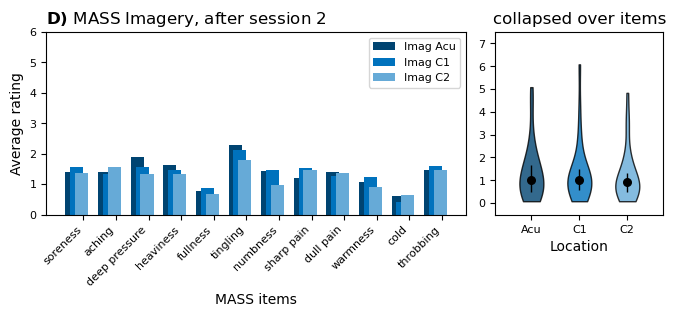

In [15]:

bar_width = 0.7

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15.919/2, 2.5), gridspec_kw={'width_ratios': [5,2]}, sharex=False)

# Plot 1: Grouped bar plot
x = np.arange(12)*2
ax1.bar(x, np.mean(imag2_acu,0), label = 'Imag Acu', color = '#004471')
ax1.bar(x+0.3, np.mean(imag2_C1,0), label = 'Imag C1', color = '#0072bd')
ax1.bar(x+0.6, np.mean(imag2_C2,0), label = 'Imag C2', color = '#66aad7')
ax1.legend(loc='best', fontsize=8)
ax1.set_ylim(0, 6)
ax1.set_xticks(x + bar_width)  # position ticks centered between group bars
ax1.set_xticklabels([str(i) for i in range(12)], fontsize=8)  # or custom labels as needed
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylabel('Average rating', fontsize=10)
ax1.set_xlabel('MASS items', fontsize=10)
ax1.set_xticklabels(['soreness', 'aching', 'deep pressure', 'heaviness', 'fullness', 'tingling', 'numbness', 'sharp pain', 'dull pain', 'warmness', 'cold', 'throbbing'], rotation=45, ha='right')
ax1.set_title('$\\mathbf{D)}$ MASS Imagery, after session 2', loc='left', fontsize=12)

# Plot 2: Violin plot
data = (np.mean(imag2_acu,1), np.mean(imag2_C1,1), np.mean(imag2_C2,1))
parts = ax2.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

colours = ['#004471', '#0072bd', '#66aad7']

for c, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colours[c])
    pc.set_edgecolor('black')
    pc.set_alpha(0.8)

# Calculate quartiles and medians across participants (axis=1)
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)

inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='black', s=30, zorder=3, label='median')
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1, label='mid 50%')

labels = ['Acu', 'C1', 'C2']
set_axis_style(ax2, labels)

ax2.set_ylim(-0.5, 7.5)
ax2.set_title("collapsed over items", fontsize=12)
ax2.set_xlabel('Location', fontsize=10)

plt.subplots_adjust(bottom=0.15, wspace=0.1)

plt.show()
